# api_data_wrangling_mini_project



In [1]:
# pip install python-dotenv

In [2]:
# get api key from your .env file
import os
from dotenv import load_dotenv

load_dotenv()
#print(os.environ)
API_KEY = os.environ.get('NASDAQ_API_KEY')

print(API_KEY) 

None


Carl Zeiss Meditec, stock ticker: AFX_X https://www.zeiss.com/meditec/int/home.html

Request packages: http://docs.python-requests.org/en/master/

collections modules: https://pymotw.com/3/collections/

In [21]:
# First, import the relevant modules

import requests
import collections
import json
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [4]:
# Now, call the Nasdaq API and pull out a small sample of the data (only one day) to get a glimpse
# into the JSON structure that will be returned
API_KEY = "XXXXXXXXXXXXXXXXXXXXXX"
url = 'https://www.quandl.com/api/v3/datasets/FSE/AFX_X?start_date=2019-01-09&end_date=2019-01-09&api_key={}'.format(API_KEY)
r = requests.get(url)
data=r.json()

In [5]:
# Inspect the JSON structure of the object you created, and take note of how nested it is,
# as well as the overall structure
data.keys()

dict_keys(['dataset'])

In [6]:
data['dataset']

{'id': 10095370,
 'dataset_code': 'AFX_X',
 'database_code': 'FSE',
 'name': 'Carl Zeiss Meditec (AFX_X)',
 'description': 'Stock Prices for Carl Zeiss Meditec (2020-11-02) from the Frankfurt Stock Exchange.<br><br>Trading System: Xetra<br><br>ISIN: DE0005313704',
 'refreshed_at': '2020-12-01T14:48:09.907Z',
 'newest_available_date': '2020-12-01',
 'oldest_available_date': '2000-06-07',
 'column_names': ['Date',
  'Open',
  'High',
  'Low',
  'Close',
  'Change',
  'Traded Volume',
  'Turnover',
  'Last Price of the Day',
  'Daily Traded Units',
  'Daily Turnover'],
 'frequency': 'daily',
 'type': 'Time Series',
 'premium': False,
 'limit': None,
 'transform': None,
 'column_index': None,
 'start_date': '2019-01-09',
 'end_date': '2019-01-09',
 'data': [['2019-01-09',
   None,
   76.55,
   74.55,
   74.8,
   None,
   None,
   None,
   None,
   None,
   None]],
 'collapse': None,
 'order': None,
 'database_id': 6129}

In [7]:
url_2017 = 'https://www.quandl.com/api/v3/datasets/FSE/AFX_X?start_date=2017-01-01&end_date=2017-12-31&api_key={}'.format(API_KEY)
r_2017 = requests.get(url_2017)
data2017=r_2017.json()

In [8]:
# index
open_index=data2017['dataset']['column_names'].index('Open')
opens=[]
for i in data2017['dataset']['data']:
    opens.append(i[open_index])

In [9]:
opens = [a for a in opens if a is not None]
print('The highest opening price was:', max(opens))
print('The lowest opening price was:', min(opens))

The highest opening price was: 53.11
The lowest opening price was: 34.0


In [10]:
close_index=data2017['dataset']['column_names'].index('Close')
close=[]
for i in data2017['dataset']['data']:
    close.append(i[close_index])

In [11]:
close = [a for a in close if a is not None]
print('The highest closing price was:', max(close))
print('The lowest closing price was:', min(close))

The highest closing price was: 53.09
The lowest closing price was: 34.06


In [12]:
high_index = data2017['dataset']['column_names'].index('High')
low_index = data2017['dataset']['column_names'].index('Low')
change = []
for i in data2017['dataset']['data']:
    change.append(i[high_index]-i[low_index])

In [13]:
change = [a for a in change if a is not None]
print('The largest change in any one day:', max(change))

The largest change in any one day: 2.8100000000000023


[Text(0.5, 1.0, 'The largest change in a day'), Text(0, 0.5, 'change($)')]

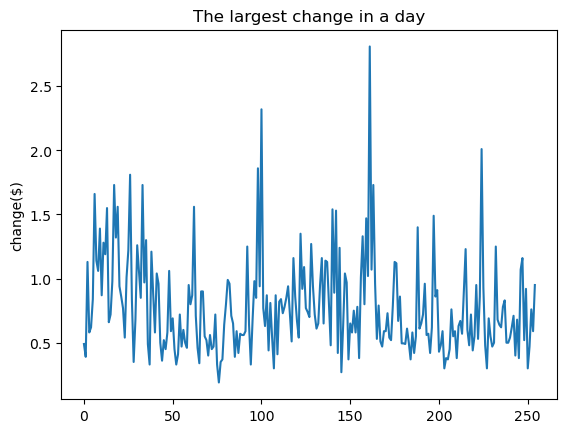

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(change)
ax.set(title = 'The largest change in a day', ylabel = 'change($)')

In [15]:
change_in2=[]
for i in data2017['dataset']['data']:
    change_in2.append(i[close_index]-i[close_index-1])

change_in2 = [a for a in change_in2 if a is not None]
print('The largest change in two days:', max(change_in2))

The largest change in two days: 1.75


[Text(0.5, 1.0, 'The largest change in two days'), Text(0, 0.5, 'change($)')]

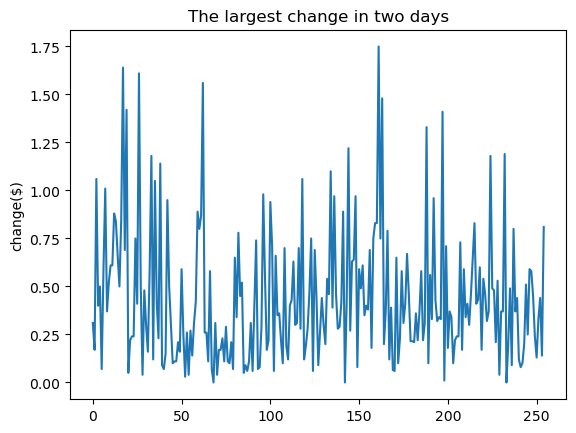

In [16]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.plot(change_in2)
ax2.set(title = 'The largest change in two days', ylabel = 'change($)')

In [30]:
aveg_trading_index = data2017['dataset']['column_names'].index('Traded Volume')
aveg_trading = []

for i in data2017['dataset']['data']:
    aveg_trading.append(i[aveg_trading_index])

a = np.array(aveg_trading)
AVG = np.mean(a)
print('The average daily trading volume was:',AVG)

Median = np.median(a)
print('The median daily trading volume was:',Median)

The average daily trading volume was: 89124.33725490196
The median daily trading volume was: 76286.0
